In [27]:
from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import MinMaxScaler #for various scaling methods
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('../input/zikavirusdataset/classification_dataset.csv')
df.head()

density_per_km   latitude  longitude  maxtempC  mintempC  totalSnow_cm  \
0    12625.800781 -34.603684 -58.381559        24         7           0.0   
1    12625.800781 -34.603684 -58.381559        24         7           0.0   
2    12625.800781 -34.603684 -58.381559        24         7           0.0   
3    12625.800781 -34.603684 -58.381559        24         7           0.0   
4    12625.800781 -34.603684 -58.381559        22        10           0.0   

   sunHour  moon_illumination  DewPointC  WindGustKmph  cloudcover  humidity  \
0     11.6                 87          6            16           0        59   
1     11.6                 87          6            16           0        59   
2     11.6                 87          6            16           0        59   
3     11.6                 87          6            16           0        59   
4     11.5                 76         10            27          34        72   

   precipMM  pressure  visibility  winddirDegree  year  month  Target  
0       0.0      1018          10            189  2016      3       1  
1       0.0      1018          10            189  2016      3       0  
2       0.0      1018          10            189  2016      3       1  
3       0.0      1018          10            189  2016      3       0  
4       0.0      1025          10             99  2016      3       0

In [4]:
df.shape

(155223, 19)

In [5]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

In [6]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [7]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [9]:
df.shape

(75345, 19)

## Feature Scaling

In [10]:
feature_scale = [feature for feature in df.columns if feature not in ['Target']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

Target  density_per_km  latitude  longitude  maxtempC  mintempC  \
0       1        0.505636  0.196981   0.742734  0.641791  0.567164   
1       0        0.505636  0.196981   0.742734  0.641791  0.567164   
2       0        0.505636  0.196981   0.742734  0.611940  0.611940   
3       1        0.505636  0.196981   0.742734  0.611940  0.611940   
4       0        0.505636  0.196981   0.742734  0.611940  0.731343   

   totalSnow_cm   sunHour  moon_illumination  DewPointC  WindGustKmph  \
0           0.0  0.625806               0.87   0.622642      0.164835   
1           0.0  0.625806               0.87   0.622642      0.164835   
2           0.0  0.619355               0.76   0.698113      0.285714   
3           0.0  0.619355               0.76   0.698113      0.285714   
4           0.0  0.432258               0.26   0.792453      0.175824   

   cloudcover  humidity  precipMM  pressure  visibility  winddirDegree  \
0        0.00  0.559140  0.000000  0.602941         1.0       0.531429   
1        0.00  0.559140  0.000000  0.602941         1.0       0.531429   
2        0.34  0.698925  0.000000  0.705882         1.0       0.274286   
3        0.34  0.698925  0.000000  0.705882         1.0       0.274286   
4        0.61  0.763441  0.097011  0.558824         0.8       0.291429   

       year     month  
0  0.333333  0.181818  
1  0.333333  0.181818  
2  0.333333  0.181818  
3  0.333333  0.181818  
4  0.333333  0.272727

# Train Test split

In [11]:
X = data.drop('Target',axis=1)
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10) #train test split in 50:50 ratio

In [12]:
X_train.head()

density_per_km  latitude  longitude  maxtempC  mintempC  totalSnow_cm  \
18866        0.000897  0.596817   0.573923  0.656716  0.656716           0.0   
39309        0.011305  0.643994   0.554194  0.537313  0.611940           0.0   
70300        0.324189  0.622078   0.490980  0.731343  0.835821           0.0   
49555        0.003224  0.551994   0.534216  0.567164  0.656716           0.0   
27057        0.001310  0.539316   0.526928  0.611940  0.761194           0.0   

        sunHour  moon_illumination  DewPointC  WindGustKmph  cloudcover  \
18866  0.625806               0.11   0.830189      0.054945        0.40   
39309  0.625806               0.53   0.698113      0.109890        0.20   
70300  0.645161               0.56   0.943396      0.109890        0.37   
49555  0.625806               0.36   0.754717      0.076923        0.41   
27057  0.380645               0.48   0.905660      0.054945        0.75   

       humidity  precipMM  pressure  visibility  winddirDegree      year  \
18866  0.892473  0.149179  0.514706         0.6       0.700000  0.333333   
39309  0.720430  0.002931  0.558824         1.0       0.400000  0.333333   
70300  0.774194  0.000879  0.500000         1.0       0.451429  0.666667   
49555  0.849462  0.107855  0.573529         0.8       0.697143  0.333333   
27057  0.978495  0.036928  0.573529         0.9       0.388571  0.333333   

          month  
18866  0.272727  
39309  0.636364  
70300  0.454545  
49555  0.909091  
27057  0.363636

# XGBoost

In [54]:
xgboostModel1 = XGBClassifier()
xgboostModel1.fit(X_train, y_train)
xgpred1 = xgboostModel1.predict(X_test)
print('Accuracy of XGBoost :{:.4f}'.format(accuracy_score(y_test,xgpred1)))

[15:33:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost :0.5524


### K Fold Cross Validation

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validation=KFold(10)

model = XGBClassifier() 
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print('Max :',np.max(results))
print('Min :',np.min(results))
print('Mean :',np.mean(results))

[09:56:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:56:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:56:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:57:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### Stratified K-fold Cross Validation

In [20]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model = XGBClassifier() 
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

[09:57:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:57:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:57:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:57:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [21]:
scores

array([0.4928998 , 0.23078965, 0.15102853, 0.12276045, 0.08467153,
       0.02867003, 0.01738784, 0.11029997, 0.44823467, 0.44133263])

In [22]:
print('Max :',np.max(scores))
print('Min :',np.min(scores))
print('Mean :',np.mean(scores))

Max : 0.492899800928998
Min : 0.01738784178391293
Mean : 0.21280751061896974


## Graphical Analysis

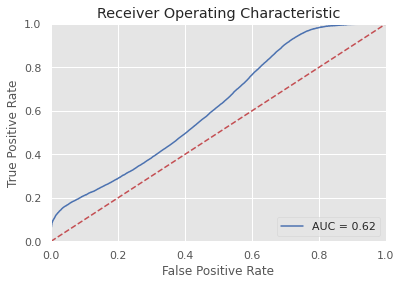

In [23]:
from sklearn.metrics import roc_curve, auc

probs               = xgboostModel1.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Tuning the model using grid searchCV

In [31]:
param_test1 = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
model = XGBClassifier(eval_metric = 'logloss',objective= 'binary:logistic',tree_method='gpu_hist')
gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring='roc_auc',n_jobs=1, iid=False, cv=5, verbose=2)

gsearch1.fit(X_train, y_train)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, total=   0.1s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, total=   0.1s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, total=   0.1s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, total=   0.1s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, total=   0.1s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3, total=   0.1s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3 
[CV]  colsample

[Parallel(n_jobs=1)]: Done 19200 out of 19200 | elapsed: 315.5min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method='gpu_hist',
                                     va

In [34]:
gsearch1.best_params_, gsearch1.best_score_

({'colsample_bytree': 0.7,
  'gamma': 0.3,
  'learning_rate': 0.25,
  'max_depth': 3,
  'min_child_weight': 5},
 0.6621046317609969)

## Model with parameters

In [37]:
best_grid=gsearch1.best_estimator_
best_grid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0.3, gpu_id=0, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=3, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='gpu_hist',
              validate_parameters=1, verbosity=None)

In [38]:
best_grid.fit(X_train, y_train)
xgpred2 = gsearch1.predict(X_test)
print('Accuracy of XGBoost :{:.4f}'.format(accuracy_score(y_test,xgpred2)))

Accuracy of XGBoost :0.5985


In [52]:
xgboostModel2 = XGBClassifier(colsample_bytree=0.7,
  gamma=0.2,
  learning_rate=0.3,
  max_depth=3,
  min_child_weight=5,
  objective= 'binary:logistic',
 eval_metric = 'logloss',
 tree_method='gpu_hist'
                             )
xgboostModel2.fit(X_train, y_train)
xgpred2 = xgboostModel2.predict(X_test)
print('Accuracy of XGBoost :{:.4f}'.format(accuracy_score(y_test,xgpred2)))

Accuracy of XGBoost :0.6021


## Graphical Analysis

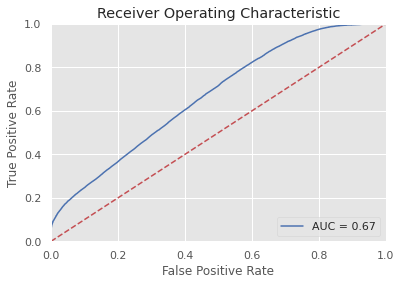

In [53]:
from sklearn.metrics import roc_curve, auc

probs               = xgboostModel2.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
print('Accuracy before tuning :',accuracy_score(y_test,xgpred1))
print()
print('Accuracy after tuning :',accuracy_score(y_test,xgpred2))

Accuracy before tuning : 0.5524115414222387

Accuracy after tuning : 0.6020757571735725
